In [8]:
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [9]:
def new_grid(n, m):
    '''
    Set up a new, empty grid
    '''
    return np.ones([n, m])

def initial_price_dist(n, m, v):
    '''
    Set up a grid where all houses have the same inital value v. Every grid box is a house
    '''
    houses = v * new_grid(n,m)
    return houses

def plot_grid(grid):
    ''' 
    Plot a grid with yellow as high value and blue as low value
    '''
    img = plt.imshow(grid,cmap='inferno')
    return img

def initial_affluence_dist(n, m, a, p):
    '''
    Initialize affluence of householders as their own grid corresponding to which house they are in
    Inputs:
    a (array): affluence group parameters 
    p (array): proportions of affluence groups 
    '''
    affluence_grid = new_grid(n,m)
    affluence_grid = np.random.choice(a,size = (n,m), p=p)

    return affluence_grid

In [10]:
# Functions for calculating house values

# Note: this is including the house itself. Do we want that?        
def neighborhood_average(i, j, m, n, grid):
    '''
    Calculate average prices depending on where you are in the grid
    '''
    row_min = max(0, i - 2)
    row_max = min(m-1, i + 2)
    
    col_min = max(0, j - 2)
    col_max = min(n-1, j + 2)
    
    neighborhood = grid[row_min:row_max+1, col_min:col_max+1]
    
    return neighborhood.mean()

def update_house_prices(house_vals, affluence_grid, weight):
    '''
    Update all of the house values by calculating new value using householder affluence and neighborhood average price
    '''
    updated_grid = house_vals.copy()
    
    m = house_vals.shape[0]
    n = house_vals.shape[1]

    for i in range(n):
        for j in range(m):
            updated_grid[i,j] = affluence_grid[i,j] + weight * neighborhood_average(i,j,m,n,house_vals)

    house_vals = updated_grid

    return house_vals

In [11]:
# Functions for choosing a random position relative to a position and considering a swap between two the positions 

def random_position(i, j, m, n):
    '''
    Pick a random grid point to compare to 
    '''
    # Ensures this will keep going until the position is not the same as the one we want to comoare to
    while True:
        rand_row = np.random.randint(0, m - 1)
        rand_col = np.random.randint(0, n - 1)
        # Ensures it is not the same as the current position
        if (rand_row, rand_col) != (i, j):
            return rand_row, rand_col

def perform_swaps(house_vals, affluence_grid, x, y):
    '''
    Check to see if we should move the householders and then move if needed.
    Inputs:
    house_vals (array): grid of house values
    affluence_grid (array): grid of affluence values
    x, y (tuples): tuples representing indices of the two householders to compare
    '''
    # Calculate the change in "satisfaction" if two householders swap
    delta = ((affluence_grid[x] - house_vals[x])**2 + (affluence_grid[y] - house_vals[y])**2 
             - (affluence_grid[x] - house_vals[y])**2 - (affluence_grid[y] - house_vals[x])**2)

    # Switch householders if swapping improves satisfaction
    if delta > 0:
        affluence_grid[x], affluence_grid[y] = affluence_grid[y], affluence_grid[x]

    return affluence_grid

In [12]:
def new_iteration(house_vals, affluence_grid):
    '''
    Perform swaps on the affluence grid and calculate the new house values
    '''
    
    m = house_vals.shape[0]
    n = house_vals.shape[1]
    
    # Iterate over each element in the array
    for i in range(m):
        for j in range(n):
        
            # Get a random position that isn't the current position
            rand_i, rand_j = random_position(i, j, m, n)
        
            x = i,j
            y = rand_i, rand_j
        
            affluence_grid = perform_swaps(house_vals, affluence_grid, x, y)
    
    house_vals = update_house_prices(house_vals, affluence_grid, weight)
    
    return house_vals, affluence_grid

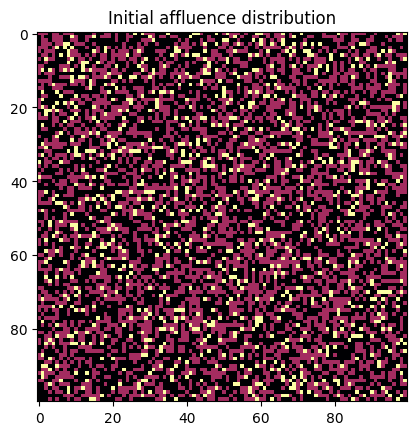

In [22]:
# Set board size
m = 100
n = 100 

# Set parameters
a = [1,0.5,0.1] # Affluence group parameters 
p = [0.1, 0.4, 0.5] # Initial affluence proportions 
v = 5 # Initial house price
weight = 0.9  # Inflationary parameter

# Initialize house price grid 
initial_prices = initial_price_dist(n, m, v)

# Initialize affluence grid 
affluence_grid = initial_affluence_dist(n, m , a, p)
fig, ax = plt.subplots()
plot_grid(affluence_grid)
plt.title("Initial affluence distribution")
plt.show()

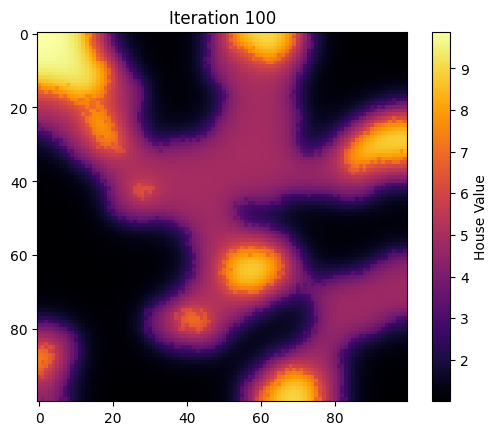

In [23]:
# Do the first house values calculation
house_vals = update_house_prices(initial_prices, affluence_grid, weight)

# Plot the initial house values 
fig, ax = plt.subplots()
img = plot_grid(house_vals)
plt.title(f"Initial prices")
plt.pause(0.5) 
clear_output(wait=True) 

# Plot the iterations 
n_steps = 100
for i in range(n_steps):
   house_vals, affluence_grid = new_iteration(house_vals, affluence_grid)
   img = plot_grid(house_vals)  
   plt.title(f"Iteration {i + 1}")
   plt.colorbar(label='House Value')
   plt.pause(0.01)  
   clear_output(wait=True) 